<font size=+6 color="#3B3534"><center><b>🏏IPL 🏆
    </b></center></font>
<br>

# Introduction

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.The brand value of the IPL in 2019 was ₹475 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy..

**Data Understanding**

matches.csv	- This dataset contains information about details of every ipl matches e.g teams,city and stadium in which match was played,name of all the umpires, winner of toss and toss decision and also the winner.

deliveries.csv-This dataset contains information about the details of every deliveries bowled in ipl.

<br>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
deliveries = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\datasets\deliveries.csv")
matches = pd.read_csv(r"C:\Users\sande\OneDrive\Desktop\datasets\matches.csv")

In [4]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
21843,93,2,Rajasthan Royals,Delhi Daredevils,16,5,SK Warne,SR Watson,V Sehwag,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
10617,45,2,Kolkata Knight Riders,Royal Challengers Bangalore,15,3,YK Pathan,MK Pandey,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
56227,238,1,Delhi Daredevils,Mumbai Indians,8,4,Y Venugopal Rao,NV Ojha,MM Patel,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
130996,553,1,Rajasthan Royals,Delhi Daredevils,12,4,KK Nair,AM Rahane,GS Sandhu,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
61824,261,2,Rajasthan Royals,Kochi Tuskers Kerala,14,2,J Botha,SR Watson,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [5]:
matches.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
396,397,2013,Kolkata,2013-04-14,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,48,0,G Gambhir,Eden Gardens,M Erasmus,VA Kulkarni,NaN
644,7902,2018,Mumbai,14/04/18,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,JJ Roy,Wankhede Stadium,K Ananthapadmanabhan,Nitin Menon,Rod Tucker
252,253,2011,Delhi,2011-04-19,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Deccan Chargers,16,0,S Sohal,Feroz Shah Kotla,PR Reiffel,RJ Tucker,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
92,93,2008,Jaipur,2008-05-11,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,SR Watson,Sawai Mansingh Stadium,SJ Davis,RE Koertzen,NaN


In [6]:
print(matches.shape,deliveries.shape)

(756, 18) (179078, 21)


In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
matches.drop(columns=['umpire3'],axis=1,inplace=True)

In [9]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**Data cleaning**

In [10]:
#city
matches[matches['city'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [11]:
#replacince nan in city with venue 
matches['city'] = matches['city'].fillna('Dubai')

In [12]:
#winne column 
matches[matches['winner'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [13]:
# winner and playerofmatch colm 
matches.loc[matches['winner'].isna(),'winner'] = "No winner"
matches.loc[matches['winner'].isna(),'player_of_match'] = "No player of match"

In [14]:
#umpire1 colm
matches[matches['umpire1'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [15]:

matches.loc[(matches['id']==5),['umpire1','umpire2']] = ["S Ravi","VK Srinivasan"]
matches.loc[(matches['id']==753),['umpire1','umpire2']] = ["Bruce Oxenford","Sundaram Ravi"]

In [16]:
# changing team to current team 
matches.replace(to_replace="Delhi Capitals",value="Delhi Daredevils",inplace=True)
deliveries.replace(to_replace="Delhi Capitals",value="Delhi Daredevils",inplace=True)

matches.replace(to_replace="Rising Pune Supergiant",value="Rising Pune Supergiants",inplace=True)
deliveries.replace(to_replace="Rising Pune Supergiant",value="Rising Pune Supergiants",inplace=True)

In [17]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

## EDA

### Total number of matches in every season 

In [18]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,S Ravi,VK Srinivasan


<BarContainer object of 12 artists>

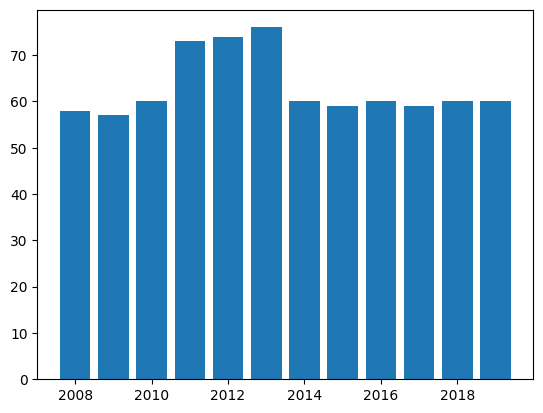

In [19]:
ax= matches.groupby("season")['id'].count()
plt.bar(ax.index, ax.values,)

### Toss Decision

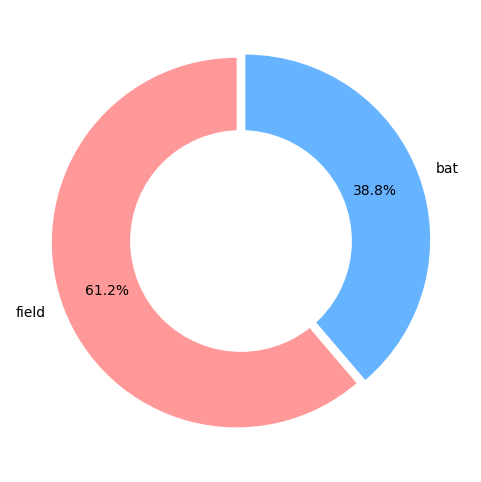

In [24]:
plt.figure(figsize=(6,6))
sizes = matches.toss_decision.value_counts()
labels = matches.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],labels=labels,autopct='%1.1f%%',startangle=90,pctdistance=0.75,
        explode = (0.025,0.025))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In more than 61% of matches, teams chose to field after winning the toss.


### Toss Decision to field or bat in each IPL season

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

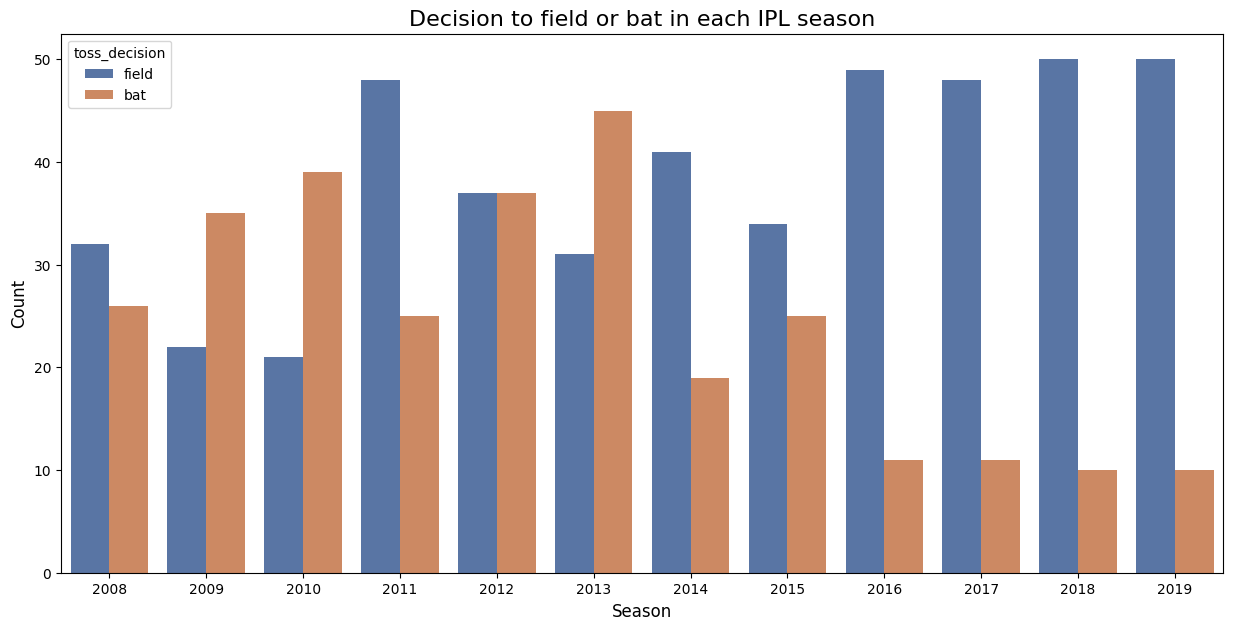

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='season',hue='toss_decision',data=matches,order =matches['season'].value_counts().index.sort_values()
              ,palette='deep')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)

We can see a trend that, decisions to field are more from IPL-2016 Season



In [ ]:
### Player of the Match


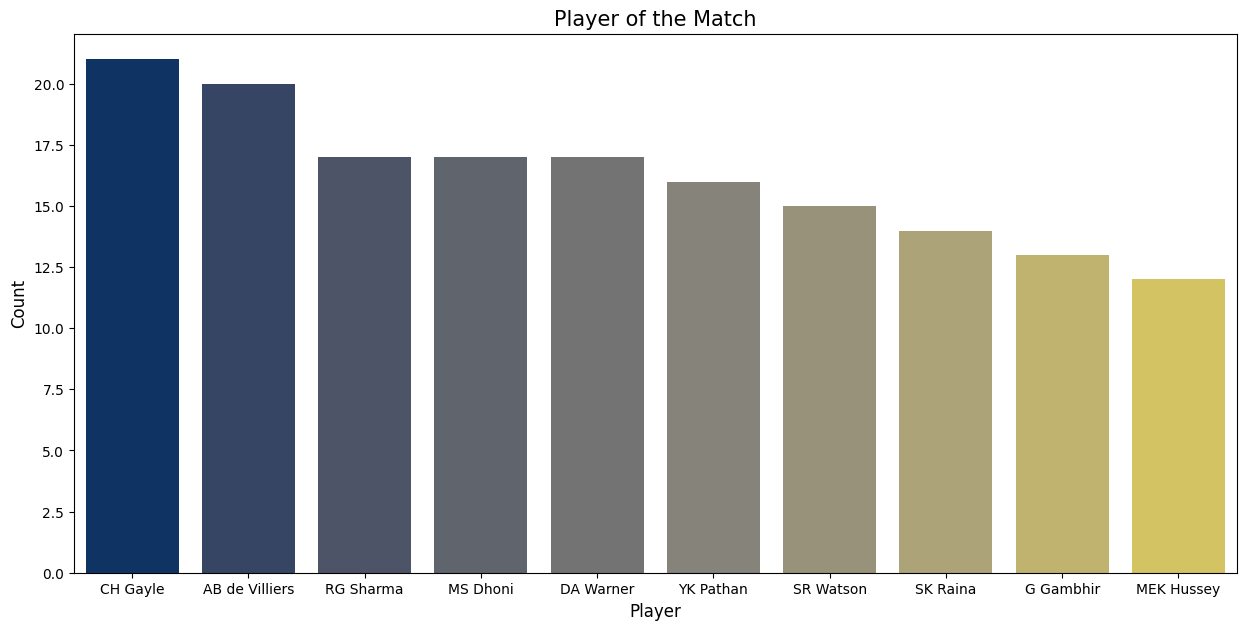

In [36]:
plt.figure(figsize=(15,7))
player_of_match=matches['player_of_match'].value_counts()[:10]
sns.barplot(data = matches,x=player_of_match.index,y=player_of_match.values,palette='cividis')
plt.title("Player of the Match",fontsize=15)
plt.xlabel('Player',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

Chris Gayle won most Man of the Match Awards

### Total matches played vs Wins by each Team 

In [20]:
matches.sample(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
129,130,2009,Cape Town,2009-04-26,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan
279,280,2011,Bangalore,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin
361,362,2012,Pune,2012-05-11,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,35,0,CH Gayle,Subrata Roy Sahara Stadium,BF Bowden,SK Tarapore
357,358,2012,Pune,2012-05-08,Pune Warriors,Rajasthan Royals,Pune Warriors,bat,normal,0,Rajasthan Royals,0,7,SR Watson,Subrata Roy Sahara Stadium,Asad Rauf,BR Doctrove


In [21]:
matches_played = pd.concat([matches['team1'],matches['team2']])
matches_played = matches_played.value_counts().reset_index().rename(columns={'index':"Teams",0:"NO.of matches played"})
matches_played['winner'] = matches['winner'].value_counts().reset_index()['winner']
matches_played['winning %'] = matches_played['winner']/matches_played['NO.of matches played']
matches_played

,Teams,NO.of matches played,winner,winning %
0,Mumbai Indians,187,109,0.582888
1,Royal Challengers Bangalore,180,100,0.555556
2,Kolkata Knight Riders,178,92,0.516854
3,Delhi Daredevils,177,84,0.474576
4,Kings XI Punjab,176,82,0.465909
5,Chennai Super Kings,164,77,0.469512
6,Rajasthan Royals,147,75,0.510204
7,Sunrisers Hyderabad,108,58,0.537037
8,Deccan Chargers,75,29,0.386667
9,Pune Warriors,46,15,0.326087


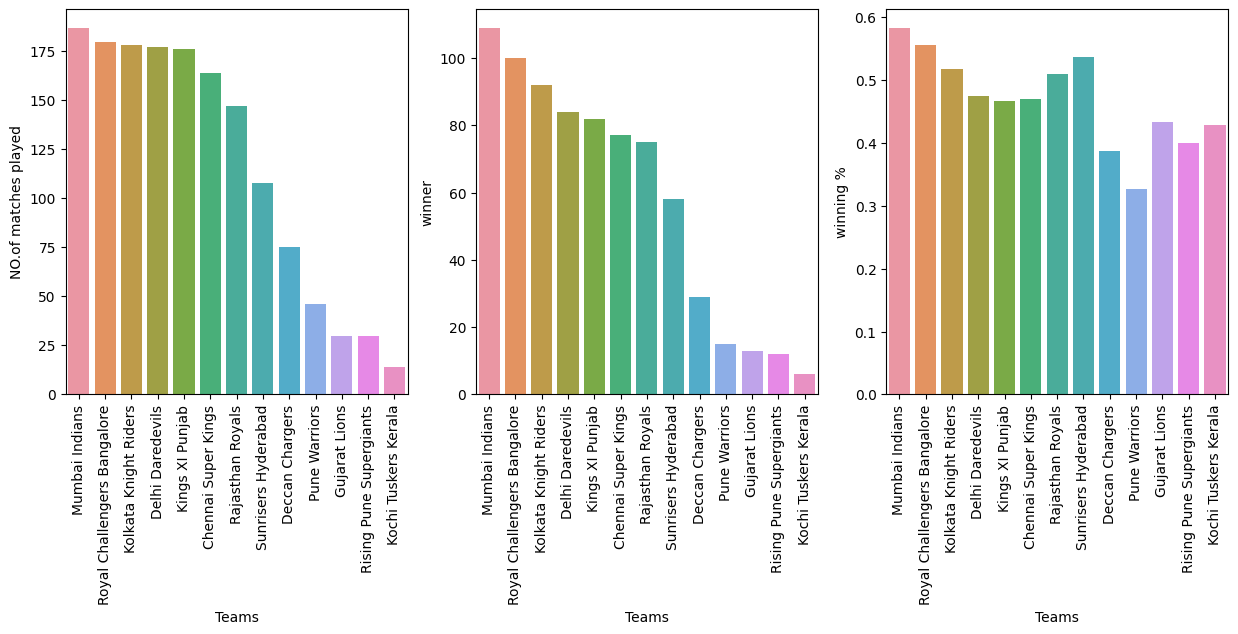

In [22]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data = matches_played, x='Teams',y='NO.of matches played',ax=ax[0]).set_xticklabels(matches_played['Teams'],rotation=90)
sns.barplot(data = matches_played, x='Teams',y='winner',ax=ax[1]).set_xticklabels(matches_played['Teams'],rotation=90)
sns.barplot(data = matches_played, x='Teams',y='winning %',ax=ax[2]).set_xticklabels(matches_played['Teams'],rotation=90)
plt.show()

### which city has hosted maximum no of matches 

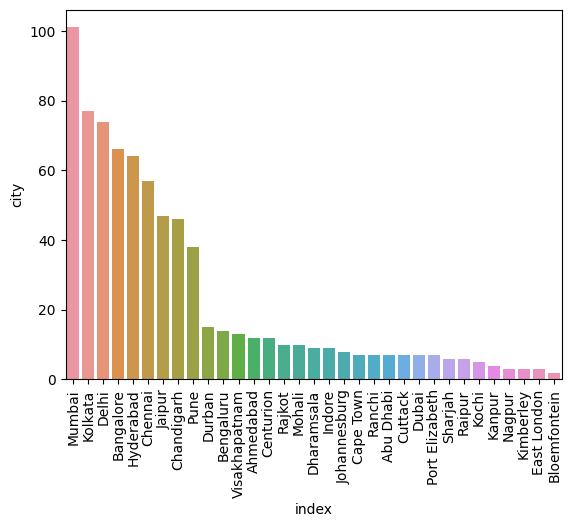

In [23]:
matches_city = matches['city'].value_counts().reset_index().sort_values(by='city',ascending=False)
sns.barplot(x='index',y='city',data=matches_city).set_xticklabels(matches_city['index'],rotation=90)
plt.show()

### no of matches in each stadium 

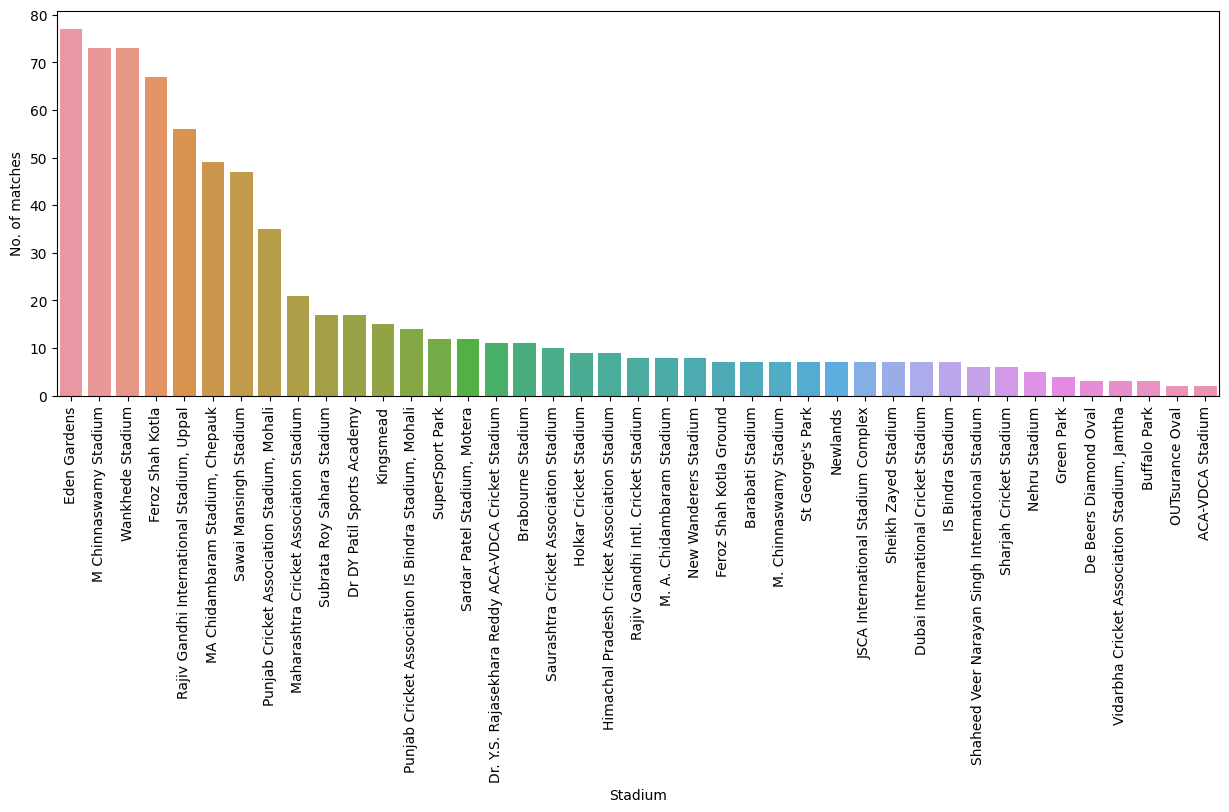

In [24]:
plt.figure(figsize=(15,5))
matches_stadium = matches['venue'].value_counts().reset_index()
matches_stadium.columns = ['Stadium','No. of matches']
sns.barplot(x='Stadium',y='No. of matches',data=matches_stadium)
plt.xticks(rotation=90)
plt.show()

### Total and Average runs per season 

In [25]:
deliveries.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
174149,11330,2,Chennai Super Kings,Royal Challengers Bangalore,11,3,MS Dhoni,AT Rayudu,MP Stoinis,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN
118135,498,2,Delhi Daredevils,Rajasthan Royals,14,3,Imran Tahir,MK Tiwary,BCJ Cutting,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [26]:
matches.sample(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
22,23,2017,Kolkata,2017-04-21,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon
573,574,2015,Pune,2015-05-20,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,71,0,AB de Villiers,Maharashtra Cricket Association Stadium,AK Chaudhary,C Shamshuddin


In [27]:
runs = matches.merge(deliveries,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
total_runs_by_season = runs.groupby('season')['total_runs'].sum().reset_index()
matches_by_season = runs.groupby('season')['match_id'].nunique().reset_index()
matches_by_season.rename(columns = {'match_id':'total_matches'},inplace=True)
matches_by_season['total_runs'] = total_runs_by_season['total_runs']
matches_by_season['avg_runs_per_match'] = matches_by_season['total_runs']/matches_by_season['total_matches']
matches_by_season

,season,total_matches,total_runs,avg_runs_per_match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


<Axes: xlabel='season', ylabel='avg_runs_per_match'>

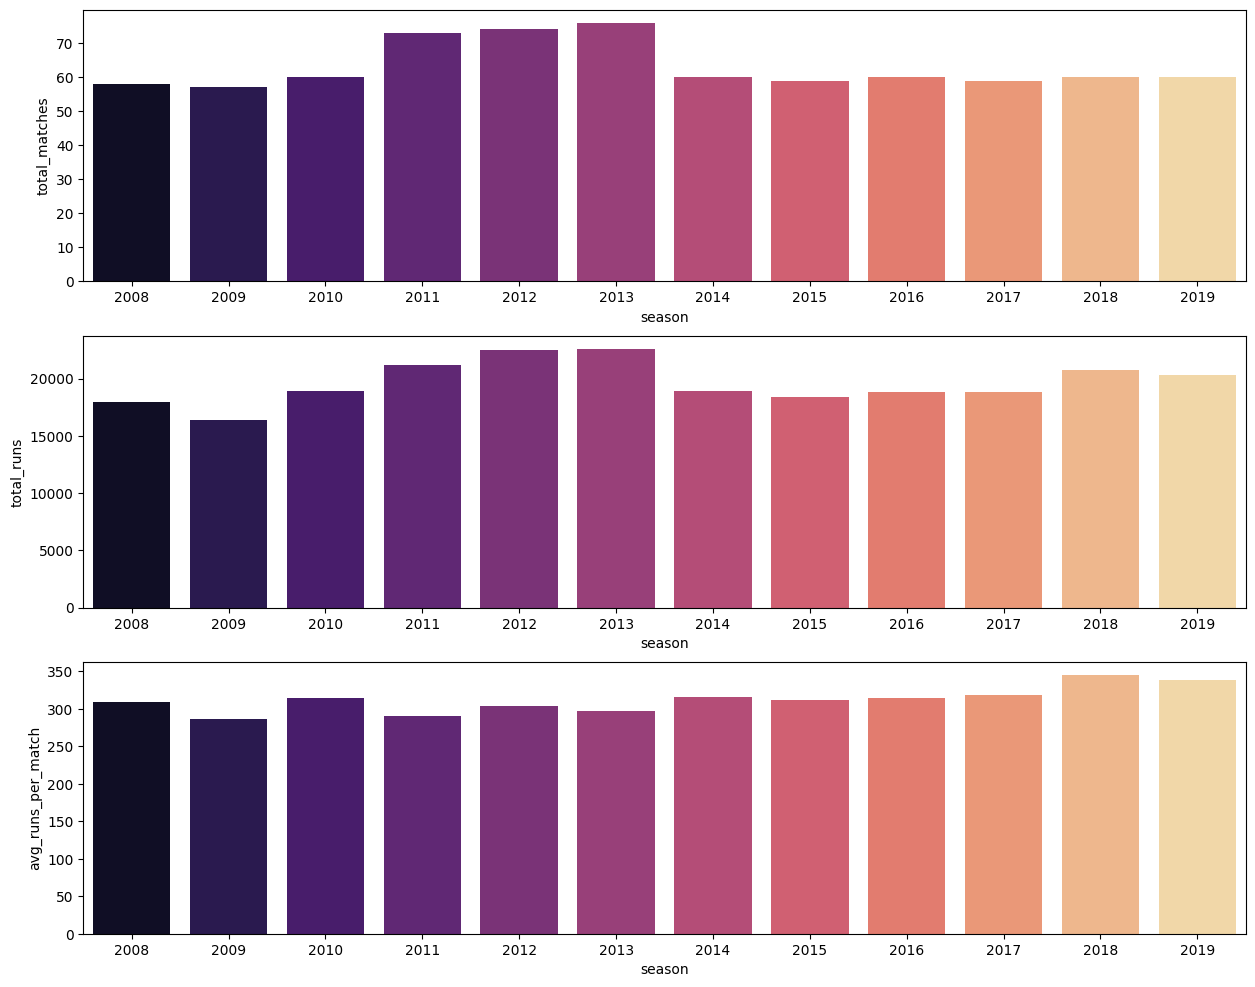

In [28]:
fig,ax=plt.subplots(3,1,figsize=(15,12))
sns.barplot(data=matches_by_season,x='season',y='total_matches',ax=ax[0],palette='magma')
sns.barplot(data=matches_by_season,x='season',y='total_runs',ax=ax[1],palette='magma')
sns.barplot(data=matches_by_season,x='season',y='avg_runs_per_match',ax=ax[2],palette='magma')

### No of Runs Scored as % of boundaries

In [29]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
126337,532,2,Kolkata Knight Riders,Kings XI Punjab,12,2,YK Pathan,AD Russell,NLTC Perera,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
39391,168,2,Kolkata Knight Riders,Rajasthan Royals,2,3,Yashpal Singh,BJ Hodge,A Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
129866,548,1,Kings XI Punjab,Delhi Daredevils,5,4,GJ Bailey,DA Miller,Z Khan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
116034,490,1,Mumbai Indians,Chennai Super Kings,8,4,LMP Simmons,AT Rayudu,MM Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
110125,465,1,Chennai Super Kings,Delhi Daredevils,5,6,SK Raina,DR Smith,Mohammed Shami,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


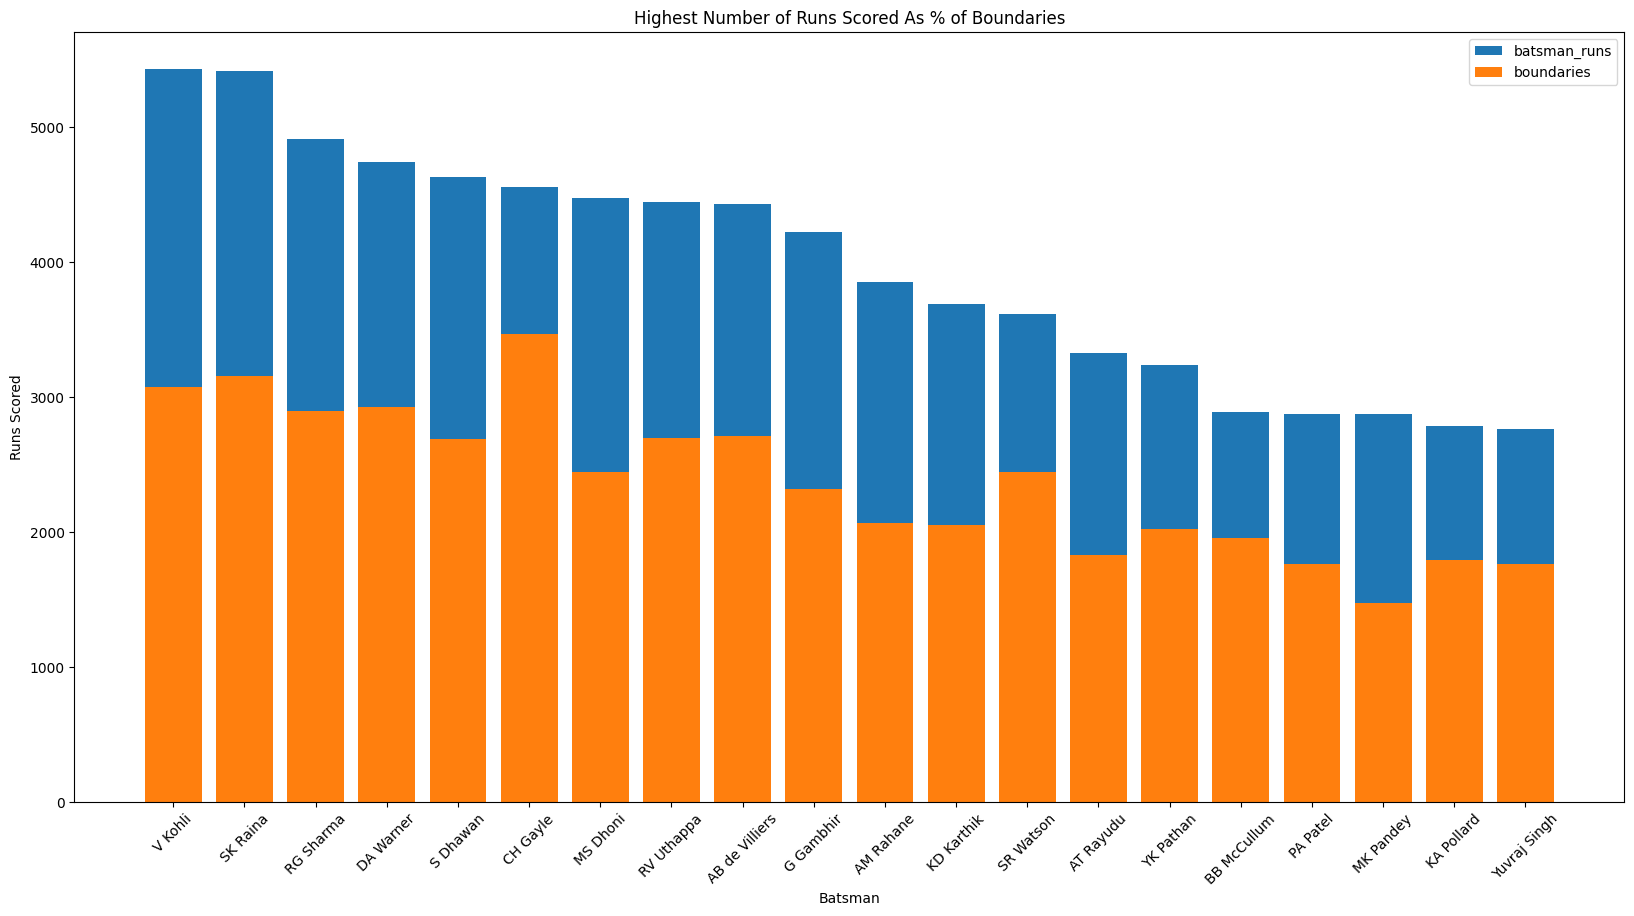

In [30]:
deliveries['boundaries'] = 0
deliveries.loc[(deliveries['batsman_runs']>=4) & (deliveries['batsman_runs']!=6),'boundaries'] = 4
deliveries.loc[(deliveries['batsman_runs']>=6),'boundaries'] = 6
pct_runs_boundaries = pd.merge(deliveries.groupby('batsman',as_index=False)['batsman_runs'].sum(),
         deliveries.groupby('batsman',as_index=False)['boundaries'].sum(),how='outer')
pct_runs_boundaries["run%"] = np.round(pct_runs_boundaries['boundaries']*100/pct_runs_boundaries['batsman_runs'],2)
pct_runs_boundaries = pct_runs_boundaries.sort_values(by='run%' ,ascending=False)
pct_runs_boundaries.dropna(inplace=True)
pct_runs_boundaries = pct_runs_boundaries.sort_values(by='batsman_runs',ascending=False).head(20)

plt.figure(figsize=(20,10))
plt.bar(pct_runs_boundaries['batsman'],pct_runs_boundaries['batsman_runs'],label='batsman_runs')
plt.bar(pct_runs_boundaries['batsman'],pct_runs_boundaries['boundaries'],label = 'boundaries')
plt.legend()
plt.xlabel('Batsman')
plt.ylabel('Runs Scored')
plt.title("Highest Number of Runs Scored As % of Boundaries")
plt.xticks(rotation=45)
plt.show()

In [31]:
pct_runs_boundaries.head(20)

,batsman,batsman_runs,boundaries,run%
486,V Kohli,5434,3074,56.57
428,SK Raina,5415,3154,58.25
367,RG Sharma,4914,2898,58.97
112,DA Warner,4741,2930,61.80
392,S Dhawan,4632,2692,58.12
92,CH Gayle,4560,3466,76.01
290,MS Dhoni,4477,2442,54.55
384,RV Uthappa,4446,2696,60.64
26,AB de Villiers,4428,2712,61.25
147,G Gambhir,4223,2322,54.98


### Runs stats  for batsman

#### century , half century , 30s runs

In [32]:
century = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
century = century[century['batsman_runs']>=100]
century = century.groupby('batsman').agg({'count'})
century.columns = century.columns.droplevel()
century = century.sort_values(by='count',ascending=False).reset_index()

In [33]:
half_century = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_century = half_century[(half_century['batsman_runs']>=50) & (half_century['batsman_runs']<100)]
half_century = half_century.groupby('batsman').agg({'count'})
half_century.columns = half_century.columns.droplevel()
half_century = half_century.sort_values(by='count',ascending=False).reset_index()

In [34]:
run_30s = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
run_30s = run_30s[(run_30s['batsman_runs']>=30) & (run_30s['batsman_runs']<50)]
run_30s = run_30s.groupby('batsman').agg({'count'})
run_30s.columns = run_30s.columns.droplevel()
run_30s = run_30s.sort_values(by='count',ascending=False).reset_index()

In [47]:
run_stat = pd.merge(century,half_century,on="batsman",how='right')
run_stat = pd.merge(run_stat,run_30s,on="batsman",how='right')
run_stat = run_stat.fillna(0).rename(columns = {'count_x':'century','count_y':'half_century','count':'30s'})
run_stat

,batsman,century,half_century,30s
0,RV Uthappa,0.0,24.0,41
1,MS Dhoni,0.0,23.0,38
2,SK Raina,1.0,38.0,37
3,KD Karthik,1.0,17.0,34
4,V Kohli,5.0,38.0,34
...,...,...,...,...
219,DJ Thornely,0.0,0.0,1
220,SK Warne,0.0,0.0,1
221,SM Katich,0.0,2.0,1
222,DJ Jacobs,0.0,0.0,1


### Batsman Stats

In [53]:
strike_rate = deliveries.groupby('batsman').agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False).reset_index()
strike_rate.rename(columns= {'batsman_runs':'strike_rate'},inplace=True)
strike_rate['strike_rate'] = np.round(strike_rate['strike_rate'],2)
strike_rate

,batsman,ball,strike_rate
0,B Stanlake,2,2.50
1,Umar Gul,19,2.05
2,RS Sodhi,2,2.00
3,S Sharma,4,2.00
4,AD Russell,803,1.80
...,...,...,...
511,L Ablish,2,0.00
512,Abdur Razzak,2,0.00
513,V Pratap Singh,1,0.00
514,ND Doshi,13,0.00


In [37]:
runs_per_match = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
runs_per_match

batsman_runs
batsman        match_id              
A Ashish Reddy 346                 10
               352                  3
               359                  8
               373                 10
               376                  4
...                               ...
Z Khan         462                  0
               470                  7
               477                  1
               578                  4
               623                  2

[11294 rows x 1 columns]

In [74]:
total_runs = runs_per_match.groupby('batsman').agg({'sum','count','mean'})
total_runs.columns = total_runs.columns.droplevel()
total_runs.rename(columns={'count':'no. of matches','sum':'total_runs','mean':'average score'},inplace=True)
total_runs = total_runs.sort_values(by='total_runs',ascending=False)

In [68]:
sixes = deliveries[deliveries['batsman_runs']==6].groupby('batsman').size().reset_index().rename(columns={0:'no.of sixes'})
sixes

,batsman,no.of sixes
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Hales,6
4,A Mishra,5
...,...,...
331,Y Venugopal Rao,37
332,YK Pathan,161
333,YV Takawale,3
334,Yuvraj Singh,149


In [69]:
fours = deliveries[deliveries['batsman_runs']==4].groupby('batsman').size().reset_index().rename(columns={0:'no.of fours'})
fours

,batsman,no.of fours
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Hales,13
...,...,...
405,YK Pathan,264
406,YV Takawale,26
407,Yashpal Singh,5
408,Yuvraj Singh,218


In [84]:
batsman_stats = pd.merge(pd.merge(pd.merge(strike_rate,total_runs,how='outer',on='batsman'),sixes,how='outer',on='batsman'),
         fours,how='outer',on='batsman').sort_values(by='total_runs',ascending=False).reset_index().drop('index',axis=1).fillna(0)
batsman_stats

,batsman,ball,strike_rate,no. of matches,total_runs,average score,no.of sixes,no.of fours
0,V Kohli,4211,1.29,169,5434,32.153846,191.0,482.0
1,SK Raina,4044,1.34,189,5415,28.650794,195.0,495.0
2,RG Sharma,3816,1.29,182,4914,27.000000,194.0,431.0
3,DA Warner,3398,1.40,126,4741,37.626984,181.0,459.0
4,S Dhawan,3776,1.23,158,4632,29.316456,96.0,526.0
...,...,...,...,...,...,...,...,...
511,C Nanda,1,0.00,1,0,0.000000,0.0,0.0
512,YA Abdulla,1,0.00,1,0,0.000000,0.0,0.0
513,Sunny Gupta,1,0.00,1,0,0.000000,0.0,0.0
514,RR Bhatkal,2,0.00,1,0,0.000000,0.0,0.0


### Fielder Stats 

In [86]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [201]:
condition_catch = (deliveries['dismissal_kind']=='caught')
condition_run_out = (deliveries['dismissal_kind']=='run out')
condition_stumped = (deliveries['dismissal_kind']=='stumped')
condition_caught_bowled = (deliveries['dismissal_kind']=='caught and bowled')

s_catch = deliveries.loc[condition_catch,:].groupby(deliveries.fielder).dismissal_kind.count()
s_run_out = deliveries.loc[condition_run_out,:].groupby(deliveries.fielder).dismissal_kind.count()
s_stumped = deliveries.loc[condition_stumped,:].groupby(deliveries.fielder).dismissal_kind.count()
s_caught_bold = deliveries.loc[condition_caught_bowled,:].groupby(deliveries.fielder).dismissal_kind.count()

catch = s_catch.to_frame().reset_index().rename(columns={'dismissal_kind':'catch'})
run_out = s_run_out.to_frame().reset_index().rename(columns={'dismissal_kind':'run_out'})
stumped = s_stumped.to_frame().reset_index().rename(columns={'dismissal_kind':'stumped'})
caught_bold = s_caught_bold.to_frame().reset_index().rename(columns={'dismissal_kind':'caught_bold'})

fielder_stats = pd.merge(pd.merge(pd.merge(catch,run_out,how='outer',on='fielder'),stumped,how='outer',on='fielder'),
                  caught_bold,how='outer',on='fielder').fillna(0).sort_values(by='catch',ascending=False)
fielder_stats

,fielder,catch,run_out,stumped,caught_bold
205,KD Karthik,109.0,14.0,29.0,0.0
407,SK Raina,99.0,16.0,0.0,0.0
276,MS Dhoni,98.0,23.0,38.0,0.0
18,AB de Villiers,93.0,14.0,7.0,0.0
367,RV Uthappa,84.0,9.0,32.0,0.0
...,...,...,...,...,...
494,R Shukla (sub),0.0,1.0,0.0,0.0
495,Umar Gul,0.0,1.0,0.0,0.0
496,WPUJC Vaas,0.0,1.0,0.0,0.0
497,KH Devdhar,0.0,0.0,1.0,0.0


### Bowler Stats 

In [173]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [219]:
condition  = ((deliveries['dismissal_kind'].notnull()) & (deliveries['dismissal_kind']!='run out') &
               (deliveries['dismissal_kind']!='retired hurt') & (deliveries['dismissal_kind']!='hit wicket') &
             (deliveries['dismissal_kind']!='obstructing the field'))
        
df_bowlers = deliveries.loc[condition,:].groupby(deliveries['bowler'])['dismissal_kind'].count().reset_index().fillna(0).rename(columns={'dismissal_kind':'wickets'}).sort_values(by='wickets',ascending=False)


highest_run_given = deliveries.groupby(['match_id','bowler']).agg({'total_runs':'sum'}).reset_index()
over_count = deliveries.groupby(['match_id','bowler','over']).agg({'total_runs':'sum'}).reset_index()
overs = over_count.groupby(['match_id','bowler']).agg({'over':'count'}).reset_index()
overs = overs[overs['over']>=2]

bowlers = pd.merge(highest_run_given,overs,how='right')
bowlers['econmy'] = bowlers['total_runs']/bowlers['over']

bowlers

,match_id,bowler,total_runs,over,econmy
0,1,A Choudhary,55,4,13.75
1,1,A Nehra,42,4,10.50
2,1,B Kumar,28,4,7.00
3,1,BCJ Cutting,35,4,8.75
4,1,MC Henriques,20,2,10.00
...,...,...,...,...,...
8094,11415,MJ McClenaghan,26,4,6.50
8095,11415,RA Jadeja,12,2,6.00
8096,11415,RD Chahar,14,4,3.50
8097,11415,SL Malinga,50,4,12.50
